<a href="https://colab.research.google.com/github/AliWaqasMSNE22/Colab_pytorch/blob/main/simplennmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
import numpy as np

In [15]:
# Lets create a model class that inherets nn.Module
class Model(nn.Module):
  # 1) Input layer (4 features of the flower)
  # 2) Hidden layer1 (no. of neurons) --> Hidden layer 2(n)
  # 3) output (3 classes of iris flower)
    def __init__ (self, in_features=4, h1 = 8, h2 =8, out_features=3):
        super().__init__() #instantiate out nn.module
        self.fc1 = nn.Linear(in_features, h1)  # self.fuly_connected (input to HL 1)
        self.fc2 = nn.Linear(h1, h2)           # self.fuly_connected (HL 1 to HL 2)
        self.out = nn.Linear(h2, out_features) # self.out (HL2 to output)
    # fuction for connection is done now need some code to more everything forward
    def forward (self, x):
        x = F.relu(self.fc1(x))  # relu rectified linear unit (if the output of something
                                 # is less than zero than take it zero else move on with the output)
        x = F.relu(self.fc2(x))  # similarly for fc2 and out
        x = self.out(x)
        return x

In [16]:
# pick a manual seed for randomization
torch.manual_seed(41)
# create an instance for the model
model = Model()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
url ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'                 # url to load data
my_df = pd.read_csv(url) # read the data from url


In [19]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [22]:
# Change last columns of output from names to numbers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

In [23]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [24]:
# lets train/test split things   set x,y
x = my_df.drop('variety', axis=1).values  #input only variety column is dropped and others are converted to arrays
y = my_df['variety'].values               #output only variety column is taken and converted to array

x



array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=41)  # test size is 20%

In [28]:
# now we need these test train in tensors
# x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

# y lables to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [29]:
# set the criteria for our model to measure the error
criterion = nn.CrossEntropyLoss()
# optimizer adam optimizer and set learning rate(if error doesnt go down after a bunch of epochs lower the LR)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # model parameters are input layers and output makes one epochs



In [32]:
# Train the model
epochs = 100  # no of times the nn will run
losses = []  # list for storing errors over epochs
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(x_train)

  #measure error
  loss = criterion(y_pred, y_train) # y predicted values vs y train values
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i %  10 == 0:
    print(f'Epochs: {i} and loss:, {loss}')

  # Do some back propagation: as we go forward we take the error rates and feed
  # back to the model for fine tuning the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epochs: 0 and loss:, 1.1318365335464478
Epochs: 10 and loss:, 0.9658561944961548
Epochs: 20 and loss:, 0.678993821144104
Epochs: 30 and loss:, 0.4004894196987152
Epochs: 40 and loss:, 0.2250950187444687
Epochs: 50 and loss:, 0.12207333743572235
Epochs: 60 and loss:, 0.07481686770915985
Epochs: 70 and loss:, 0.05451279506087303
Epochs: 80 and loss:, 0.044374920427799225
Epochs: 90 and loss:, 0.03837944194674492


Text(0, 0.5, 'loss')

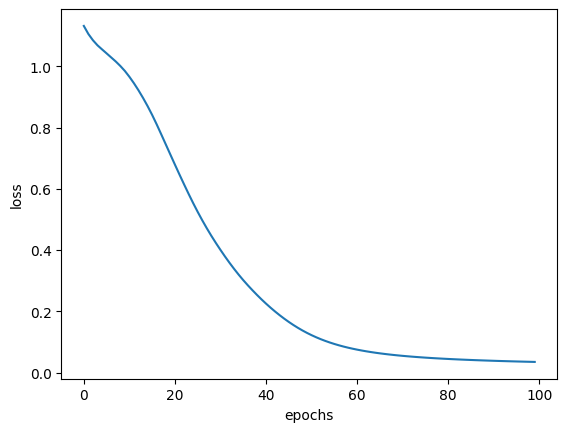

In [35]:
plt.plot(range(epochs),losses)
plt.xlabel('epochs')
plt.ylabel('loss')
